In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
from vietocr.tool.config import Cfg
from vietocr.predict import Predictor

In [3]:
config = Cfg.load_config_from_name('vgg_transformer')
config['device'] = 'cuda'  # Dùng GPU nếu có
vietocr_model = Predictor(config)

c:\Users\lyxnp\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
18533it [00:14, 1263.94it/s]


In [4]:
from ultralytics import YOLO
# Load model YOLOv8
model = YOLO("E:/ComputerVision/FinalReport/best.pt")  # Thay đường dẫn nếu cần

In [5]:
from PIL import Image
def detect_and_recognize_plate(image_url):
    """
    Hàm này thực hiện các bước:
    1. Tải ảnh từ URL
    2. Dùng YOLOv8 để phát hiện biển số xe
    3. Cắt vùng biển số ra khỏi ảnh gốc
    4. Dùng VietOCR để nhận diện chữ trên biển số
    """
    # 🔹 Bước 1: Tải ảnh từ URL
    resp = urllib.request.urlopen(image_url)
    image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển BGR -> RGB

    # 🔹 Bước 2: Dự đoán biển số bằng YOLOv8
    results = model(image)

    # 🔹 Bước 3: Duyệt qua các bounding boxes và nhận diện biển số
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Lấy tọa độ bounding box

            # Cắt biển số từ ảnh
            license_plate = image_rgb[y1:y2, x1:x2]

            # Hiển thị ảnh biển số
            plt.figure(figsize=(4, 2))
            plt.imshow(license_plate)
            plt.axis("off")
            plt.title("License Plate")
            plt.show()

            # 🔹 Chuyển ảnh sang định dạng phù hợp cho VietOCR (PIL Image)
            license_plate_pil = Image.fromarray(license_plate)

            # 🔹 Nhận diện chữ trên biển số
            text = vietocr_model.predict(license_plate_pil)
            print("🚘 Biển số xe:", text)


In [6]:
from PIL import Image
import urllib.request
import numpy as np
import cv2

def detect_and_recognize_plate_onlytext(image_url):
    """
    Nhận diện biển số xe từ ảnh URL:
    1. Tải ảnh từ URL
    2. Dùng YOLOv8 để phát hiện biển số xe
    3. Dùng VietOCR để nhận diện chữ trên biển số
    Trả về: Chuỗi biển số (str)
    """
    try:
        # Tải ảnh từ URL
        resp = urllib.request.urlopen(image_url)
        image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Phát hiện biển số bằng YOLOv8
        results = model(image)

        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                license_plate = image_rgb[y1:y2, x1:x2]
                license_plate_pil = Image.fromarray(license_plate)
                text = vietocr_model.predict(license_plate_pil)
                return text.strip()  # Trả về text đã cắt trắng

    except Exception as e:
        print("Lỗi:", e)

    return "Không nhận diện được"


In [7]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

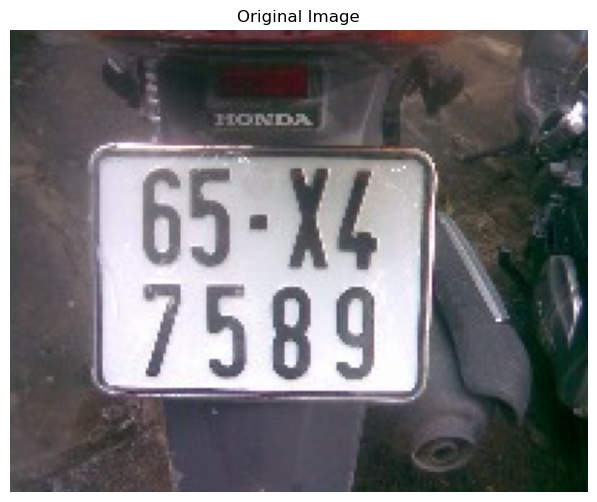

In [20]:
import urllib.request
import numpy as np
import cv2
import matplotlib.pyplot as plt

url = "https://source.roboflow.com/YLrnXOQ64edrmX3PYmcCoRxCpae2/0DDRJHK1lrKe0OtabNFu/thumb.jpg"
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)

# Chuyển đổi sang ảnh OpenCV
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Chuyển từ BGR -> RGB để hiển thị đúng màu
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh gốc
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [21]:
# Predict với YOLOv8
results = model(image)

# Hiển thị kết quả trực tiếp
for result in results:
    result.show()  # Hiển thị ngay trên Colab


0: 512x640 1 license_plate, 71.7ms
Speed: 5.0ms preprocess, 71.7ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 640)


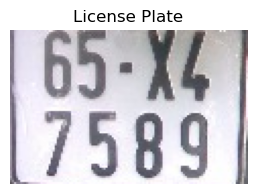

In [22]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Lấy tọa độ (xmin, ymin, xmax, ymax)

        # Cắt biển số ra khỏi ảnh gốc
        license_plate = image_rgb[y1:y2, x1:x2]

        # Hiển thị ảnh biển số
        plt.figure(figsize=(4, 2))
        plt.imshow(license_plate)
        plt.axis("off")
        plt.title("License Plate")
        plt.show()


0: 512x640 1 license_plate, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 640)


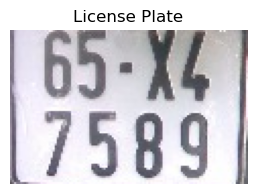

🚘 Biển số xe: 65.39


In [23]:
detect_and_recognize_plate(url)